<a href="https://colab.research.google.com/github/Sara0p/MarketBasketAnalysis/blob/main/Market_Basket_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive


drive.mount('/content/drive')
# transform it into dataframe
data=pd.read_csv('/content/drive/MyDrive/task2/marketdata.csv',encoding='latin-1') # Or 'utf-8', 'iso-8859-1', etc.
## observing the shape of the data
print(data.shape)
data.head()

Mounted at /content/drive
(522064, 7)


<ipython-input-1-69676903b1be>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/task2/marketdata.csv',encoding='latin-1') # Or 'utf-8', 'iso-8859-1', etc.


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
# Check for missing values
data.isnull().sum()

,0
BillNo,0
Itemname,1455
Quantity,0
Date,0
Price,0
CustomerID,134041
Country,0


In [ ]:
# drop columns
data = data.drop('BillNo', axis=1)
data = data.drop('Quantity', axis=1)
data = data.drop('Price', axis=1)

In [ ]:
# Display a summary of the DataFrame 'data'
data.info(verbose=True)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Itemname    520609 non-null  object 
 1   Date        522064 non-null  object 
 2   CustomerID  388023 non-null  float64
 3   Country     522064 non-null  object 
dtypes: float64(1), object(3)
memory usage: 15.9+ MB


,CustomerID
count,388023.000000
mean,15316.931710
std,1721.846964
min,12346.000000
25%,13950.000000
50%,15265.000000
75%,16837.000000
max,18287.000000


In [ ]:
# drop duplicate
data.drop_duplicates(inplace=True)

In [ ]:
# Assume data is your DataFrame
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y %H:%M', errors='coerce')

# Check for any NaT values in the 'Date' column to handle parsing issues
if data['Date'].isnull().any():
    print("There were issues with some date entries. Check for NaT values.")

# Add 'year', 'month', 'day', and 'day_name' columns
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_name'] = data['Date'].dt.day_name()

In [ ]:
# Save the DataFrame to a CSV file named 'cleaned_data.csv' in your Google Drive
data.to_csv('/content/drive/MyDrive/task2/cleaned_data.csv', index=False)


In [ ]:
print(data.head())

                              Itemname                Date  CustomerID  \
0   WHITE HANGING HEART T-LIGHT HOLDER 2010-12-01 08:26:00     17850.0   
1                  WHITE METAL LANTERN 2010-12-01 08:26:00     17850.0   
2       CREAM CUPID HEARTS COAT HANGER 2010-12-01 08:26:00     17850.0   
3  KNITTED UNION FLAG HOT WATER BOTTLE 2010-12-01 08:26:00     17850.0   
4       RED WOOLLY HOTTIE WHITE HEART. 2010-12-01 08:26:00     17850.0   

          Country  year  month  day   day_name  
0  United Kingdom  2010     12    1  Wednesday  
1  United Kingdom  2010     12    1  Wednesday  
2  United Kingdom  2010     12    1  Wednesday  
3  United Kingdom  2010     12    1  Wednesday  
4  United Kingdom  2010     12    1  Wednesday  


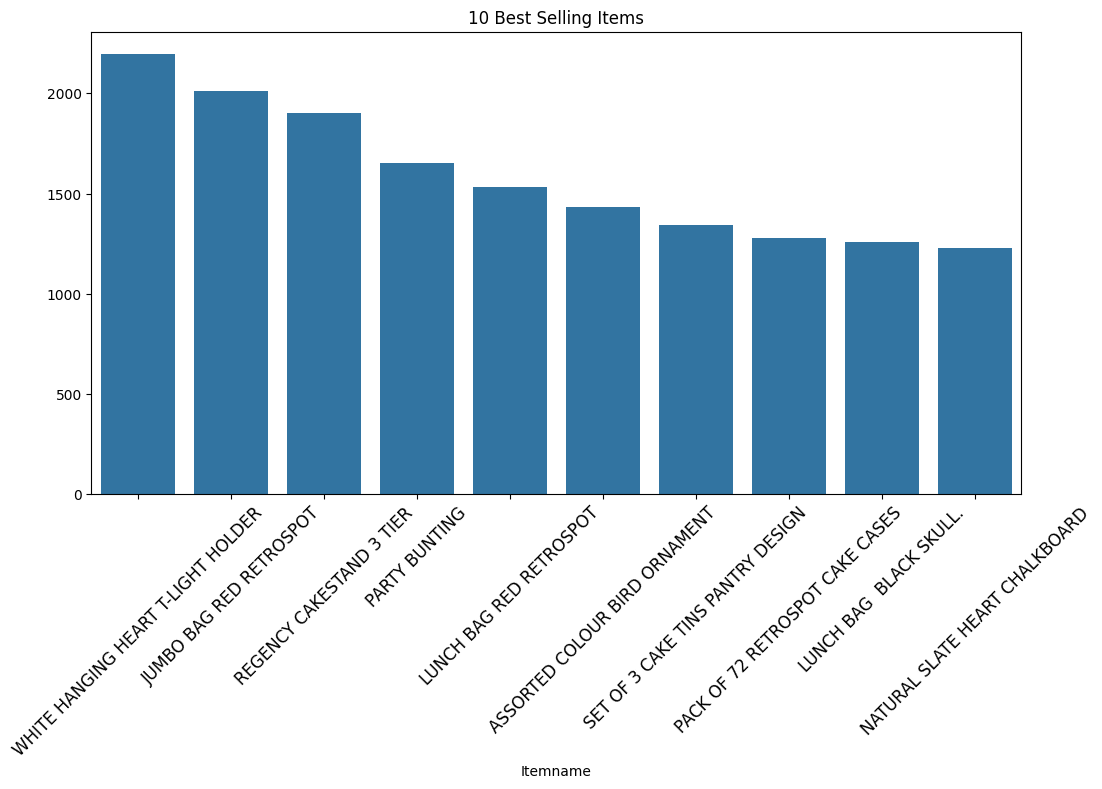

In [ ]:
 # Import matplotlib.pyplot for 10 Best Selling Items
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.barplot(x = data['Itemname'].value_counts()[:10].index,
           y = data['Itemname'].value_counts()[:10].values)
plt.xticks(size=12, rotation=45)
plt.title('10 Best Selling Items')
plt.show()

In [ ]:
# Group the DataFrame 'data' by 'CustomerID', 'Date', and 'Itemname'
# Count the occurrences of 'Itemname' for each group
item_count = data.groupby(['CustomerID', 'Date', 'Itemname'])['Itemname'].count().reset_index(name='Count')
item_count.head(10)

,CustomerID,Date,Itemname,Count
0,12346.0,2011-01-18 10:01:00,MEDIUM CERAMIC TOP STORAGE JAR,1
1,12347.0,2010-12-07 14:57:00,3D DOG PICTURE PLAYING CARDS,1
2,12347.0,2010-12-07 14:57:00,AIRLINE BAG VINTAGE JET SET BROWN,1
3,12347.0,2010-12-07 14:57:00,ALARM CLOCK BAKELIKE CHOCOLATE,1
4,12347.0,2010-12-07 14:57:00,ALARM CLOCK BAKELIKE GREEN,1
5,12347.0,2010-12-07 14:57:00,ALARM CLOCK BAKELIKE ORANGE,1
6,12347.0,2010-12-07 14:57:00,ALARM CLOCK BAKELIKE PINK,1
7,12347.0,2010-12-07 14:57:00,ALARM CLOCK BAKELIKE RED,1
8,12347.0,2010-12-07 14:57:00,BATHROOM METAL SIGN,1
9,12347.0,2010-12-07 14:57:00,BLACK CANDELABRA T-LIGHT HOLDER,1


In [ ]:
# Create a new column 'Transaction' in the item_count DataFrame
item_count['Transaction'] = item_count.groupby(['CustomerID', 'Date'])['Date'].ngroup()+1

In [ ]:
# Display (item_count)
item_count.head()

,CustomerID,Date,Itemname,Count,Transaction
0,12346.0,2011-01-18 10:01:00,MEDIUM CERAMIC TOP STORAGE JAR,1,1
1,12347.0,2010-12-07 14:57:00,3D DOG PICTURE PLAYING CARDS,1,2
2,12347.0,2010-12-07 14:57:00,AIRLINE BAG VINTAGE JET SET BROWN,1,2
3,12347.0,2010-12-07 14:57:00,ALARM CLOCK BAKELIKE CHOCOLATE,1,2
4,12347.0,2010-12-07 14:57:00,ALARM CLOCK BAKELIKE GREEN,1,2


In [ ]:
# Create a pivot table from the item_count DataFrame
# Index is set to 'CustomerID', columns are 'Itemname', and values are the 'Count' of items
# values indicate whether the customer purchased the item (1) or not (0)
basket =item_count.pivot_table(index='CustomerID', columns='Itemname', values='Count', aggfunc='sum', fill_value=0)

# Convert the counts in the basket DataFrame to binary values (1 if item is present, 0 if absent)
basket = (basket > 0).astype(int)


basket.head()


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Import necessary functions for association rule mining from mlxtend library
from mlxtend.frequent_patterns import association_rules, apriori


# Generate frequent itemsets from the basket DataFrame using the Apriori algorithm
# 'min_support=0.05' specifies the minimum support threshold (5% of transactions)
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False).head(10)


# Generate association rules from the frequent itemsets
# 'metric="confidence"' specifies the metric to use for rule evaluation
# 'min_threshold=0.6' sets the minimum confidence level for the rules (60%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)


print(rules)


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                          antecedents  \
0                       (60 TEATIME FAIRY CAKE CASES)   
1                        (ALARM CLOCK BAKELIKE GREEN)   
2                          (ALARM CLOCK BAKELIKE RED)   
3                         (ALARM CLOCK BAKELIKE PINK)   
4                        (BAKING SET SPACEBOY DESIGN)   
..                                                ...   
91  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
92  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
93  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...   
94  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
95                   (PINK REGENCY TEACUP AND SAUCER)   

                                          consequents  antecedent support  \
0                   (PACK OF 72 RETROSPOT CAKE CASES)            0.094950   
1                          (ALARM CLOCK BAKELIKE RED)            0.074238   
2                        (ALARM CLOCK BAKELIKE GREEN)            0.088434   
3      

In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.094950,0.145916,0.061671,0.649510,4.451266,0.047816,2.436828,0.856687
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.074238,0.088434,0.060740,0.818182,9.251914,0.054175,5.013614,0.963438
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.088434,0.074238,0.060740,0.686842,9.251914,0.054175,2.956215,0.978442
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.066093,0.088434,0.051199,0.774648,8.759637,0.045354,4.045075,0.948531
4,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT),0.067954,0.133582,0.055853,0.821918,6.152928,0.046775,4.865273,0.898535


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


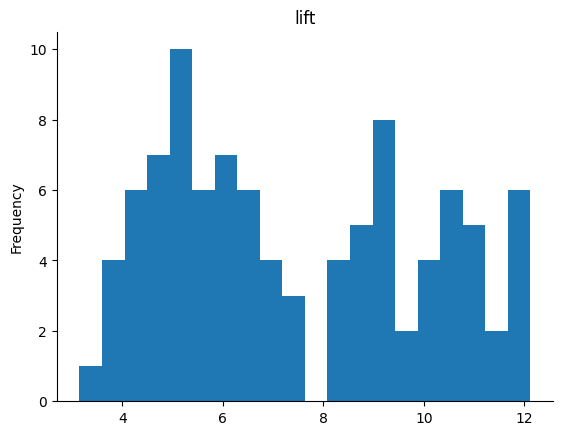

In [ ]:
# lift

from matplotlib import pyplot as plt
rules['lift'].plot(kind='hist', bins=20, title='lift')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


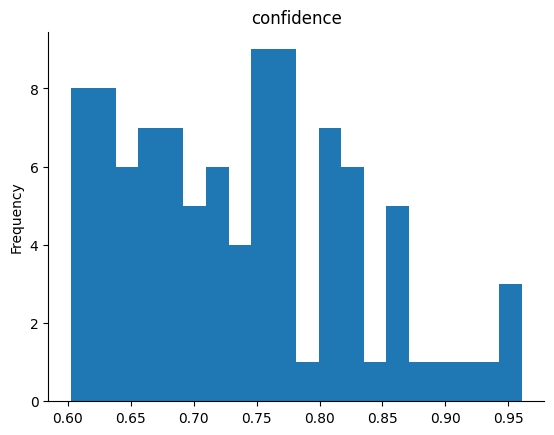

In [ ]:
# confidence

from matplotlib import pyplot as plt
rules['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


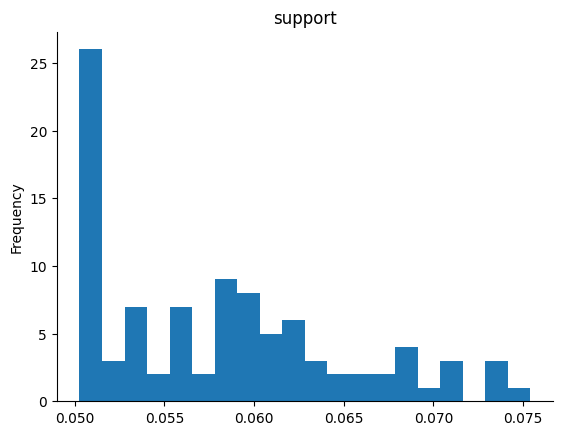

In [ ]:
#  support

from matplotlib import pyplot as plt
rules['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)